# 분류 - 의사결정나무

# 0. 패키지 불러오기 

In [8]:
# 데이터 구성:Series,DataFrame
import pandas as pd

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# export_graphviz : 나무 구조 생성 및 저장 
from sklearn.tree import export_graphviz

# graphviz : 나무 구조 시각화 (dot.확자아 파일 불러오기 등)
import graphviz

# 데이터 분할:train,test
from sklearn.model_selection import train_test_split

# 분류 Decision Tree
from sklearn.tree import DecisionTreeClassifier 

# 최적 모델, 파라미터 탐색 
from sklearn.model_selection import GridSearchCV

# 모델 성능 평가
from sklearn.metrics import confusion_matrix

# 한글 깨짐 방지
import matplotlib.font_manager as fm 
font_list=[font.name for font in fm.fontManager.ttflist]
font_list
plt.rcParams['font.family']='NanumBarunGothic'

In [9]:
# 나무 시각화 페이지

# os환경
import os

# PATH 설정:graphviz 설치된 경로 지정
os.environ['PATH']+=os.pathsep+'C:/Program Files (x86)/Graphviz2.38/bin/'

# 1. 데이터 구성하기 

### 1-1 데이터 불러오기

In [10]:
df_raw=pd.read_csv("/home/piai/Downloads/데이터_1/IRIS.csv", engine='python')
df_raw.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 1-2 데이터 전처리 - 결측치 처리

In [11]:
df_raw.isnull().sum(axis=0)

SEPAL_LENGTH    0
SEPAL_WIDTH     0
PETAL_LENGTH    0
PETAL_WIDTH     0
SPECIES         0
dtype: int64

#### 결측치가 없다.

In [16]:
# 설명변수, 목표변수 데이터 지정 
df_raw_x=df_raw.drop("SPECIES", axis=1, inplace=False)
df_raw_y=df_raw["SPECIES"]

### 1-3 더미변수 생성

In [17]:
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성
df_raw_x=pd.get_dummies(df_raw_x)

# 더미변수 생성된 데이터의 상위 5개 row를 확인
df_raw_dummy.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES_setosa,SPECIES_versicolor,SPECIES_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


### 1-4 설명변수, 목표변수 지정 

### 1-5 데이터 분할

In [20]:
# train, test 데이터를 7:3 비율로 분할한다. 
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (105, 4)
train data Y size : (105,)
test data X size : (45, 4)
test data Y size : (45,)


#### train, test 데이터를 7:3 비율로 분할하고 , train, validation 데이터를 4:3 비율로 분할 한다. 

# 2. 모델 생성

### 2-0 기본으로 모델 생성 

In [21]:
tree_uncustomized=DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 설명력 
print("Accuracy on training set:{:.3f}".format(tree_uncustomized.score(df_train_x,df_train_y)))

# Test 데이터 설명력 
print("Accuracy on test set:{:.3f}".format(tree_uncustomized.score(df_test_x,df_test_y)))

Accuracy on training set:1.000
Accuracy on test set:0.978


#### training 데이터는 100%, test 데이터는 89.5%로 모델은 train 데이터에 과적합되어 있다. 

### 2-1 모델 Parameter 조정 : 최대 깊이 변경에 따른 모델 성능

In [22]:
# train 및 test 설명력 결과 저장
train_score=[]
test_score=[]

# max_depth:최대 깊이 변경
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree=DecisionTreeClassifier(random_state=1234 ,max_depth=v_max_depth)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
    
# 결과 저장
df_score_depth=pd.DataFrame()
df_score_depth['MinSamplesLeaf']=para_depth
df_score_depth['TrainScore']=train_score
df_score_depth['TestScore']=test_score

# 모델 설명력 확인
df_score_depth.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.686,0.622
1,2,0.962,0.956
2,3,0.981,0.978
3,4,0.990,0.978
4,5,1.000,0.978
5,6,1.000,0.978
6,7,1.000,0.978
7,8,1.000,0.978
8,9,1.000,0.978
9,10,1.000,0.978


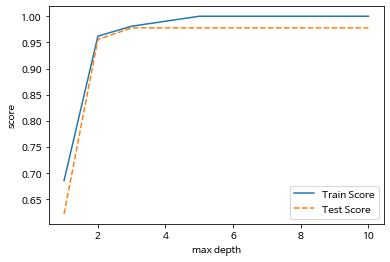

In [23]:
# 모델 설명력 그래프 확인
plt.plot(para_depth,train_score,linestyle='-',label='Train Score')
plt.plot(para_depth,test_score,linestyle='--',label='Test Score')
plt.ylabel('score')
plt.xlabel('max depth')
plt.legend()

In [24]:
# 변수명 저장 
v_feature_name=df_train_x.columns

# 깊이가 4인 모델 
tree_low=DecisionTreeClassifier(max_depth=4, random_state=1234)
tree_low.fit(df_train_x,df_train_y)

# 트리 모델을 tree_low.dot 파일로 저장 (목표변수 0: Good, 1:Bad) 
export_graphviz(tree_low, out_file="tree_low.dot", class_names=["Good", "Bad"],\
               feature_names=v_feature_name, impurity=True, filled=True)

# graphviz를 이용해 트리 모델 시각화
with open("tree_low.dot") as f: 
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

IndexError: list index out of range

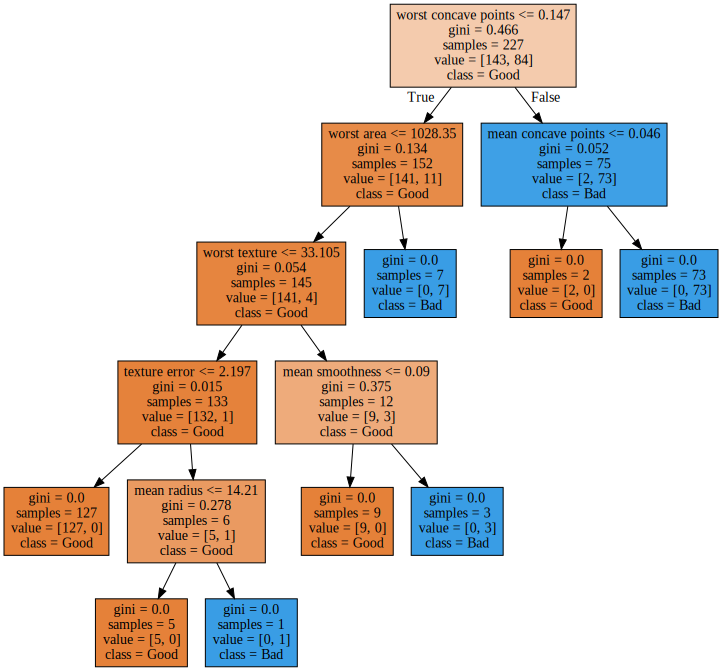

In [15]:
# 깊이가 6인 모델 
tree_low=DecisionTreeClassifier(max_depth=6, random_state=1234)
tree_low.fit(df_train_x,df_train_y)

# 트리 모델을 tree_low.dot 파일로 저장 (목표변수 0: Good, 1:Bad) 
export_graphviz(tree_low, out_file="tree_low.dot", class_names=["Good", "Bad"],\
               feature_names=v_feature_name, impurity=True, filled=True)

# graphviz를 이용해 트리 모델 시각화
with open("tree_low.dot") as f: 
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

#### train test score는 지속적으로 상승하지만 Train/test 데이터의 성능 변화를 고려하여 최대 깊이를 4로 선택한다. 또한 최대 깊이를 4로 하였을 때와 6으로 하였을 때 비교하면 6은 과대적합될 가능성이 있으므로 4가 적절하다고 판단할 수 있다. 

### 2-2 min_samples_split : 분리 노드의 최소 자료 수 변경에 따른 모델 성능 

In [16]:
# train 밒 test 정확도 결과 저장용 
train_accuracy=[]; test_accuracy=[]

# min_smaples_split: 분할하기 위한 노드의 최소 샘플수 
para_split=[n_split * 10 for n_split in range(1,11)] # 참조 : para_leaf:[10,20,30,...,100]

for v_min_samples_split in para_split:
    tree=DecisionTreeClassifier(random_state=1234,min_samples_split=v_min_samples_split,\
                                max_depth=4)
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
    
# 데이터 테이블로 저장 
df_accuracy_split=pd.DataFrame()
df_accuracy_split['MinSamplesLeaf']=para_split
df_accuracy_split['TrainAccuracy']=train_accuracy
df_accuracy_split['TestAccuracy']=test_accuracy

# 모델 정확도 확인 
df_accuracy_split.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,10,0.996,0.901
1,20,0.982,0.901
2,30,0.982,0.901
3,40,0.982,0.901
4,50,0.982,0.901
5,60,0.982,0.901
6,70,0.982,0.901
7,80,0.974,0.906
8,90,0.974,0.906
9,100,0.974,0.906


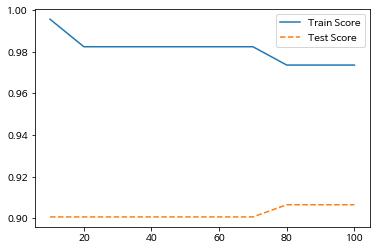

In [18]:
# 모델 설명력 그래프 확인
plt.plot(para_split,train_accuracy,linestyle='-',label='Train Score')
plt.plot(para_split,test_accuracy,linestyle='--',label='Test Score')
plt.legend()

#### 분리 노드의 최소 자료 수 증가에 따라 모델의 정확도는 감소하며, train/test 데이터의 성능 변화를 고려하여 80 선택

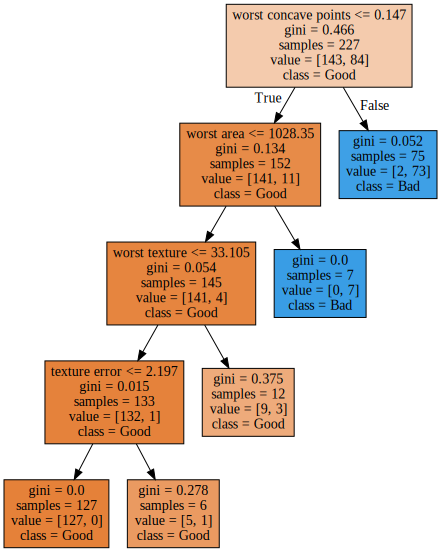

In [20]:
# 분리 노드의 최소 사료 수가 80인 무델 
tree_low=DecisionTreeClassifier(random_state=1234,min_samples_split=80,max_depth=4)
tree_low.fit(df_train_x,df_train_y)

export_graphviz(tree_low,out_file='tree_low.dot',class_names=["Good","Bad"],\
               feature_names=v_feature_name,impurity=True,filled=True)

with open('tree_low.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

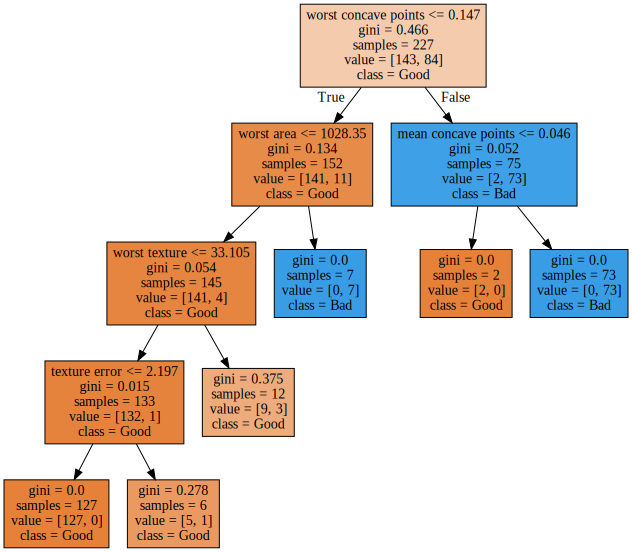

In [21]:
# 분리 노드의 최소 사료 수가 70인 무델 
tree_low=DecisionTreeClassifier(random_state=1234,min_samples_split=70,max_depth=4)
tree_low.fit(df_train_x,df_train_y)

export_graphviz(tree_low,out_file='tree_low.dot',class_names=["Good","Bad"],\
               feature_names=v_feature_name,impurity=True,filled=True)

with open('tree_low.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

#### 분리 노드의 최소 자료 수를 70과 80으로 나누어 고려하였을 때, 80은 과소적합의 가능성이 있으므로 70을 선택하기로 한다. 

### 2-3 min_samples_leaf : 잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능 

In [26]:
# train 밒 test 정확도 결과 저장용 
train_accuracy=[]; test_accuracy=[]

# min_smaples_split: 분할하기 위한 노드의 최소 샘플수 
para_leaf=[n_leaf * 2 for n_leaf in range(1,11)] # 참조 : para_leaf:[2,4,6,...20]

for v_min_samples_leaf in para_leaf:
    tree=DecisionTreeClassifier(random_state=1234,min_samples_leaf=v_min_samples_leaf,\
                            min_samples_split=70,max_depth=4)
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
    
# 데이터 테이블로 저장 
df_accuracy_leaf=pd.DataFrame()
df_accuracy_leaf['MinSamplesLeaf']=para_leaf
df_accuracy_leaf['TrainAccuracy']=train_accuracy
df_accuracy_leaf['TestAccuracy']=test_accuracy

# 모델 정확도 확인 
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,2,0.982,0.901
1,4,0.974,0.906
2,6,0.974,0.906
3,8,0.969,0.930
4,10,0.969,0.930
5,12,0.960,0.918
6,14,0.952,0.924
7,16,0.943,0.883
8,18,0.943,0.883
9,20,0.943,0.883


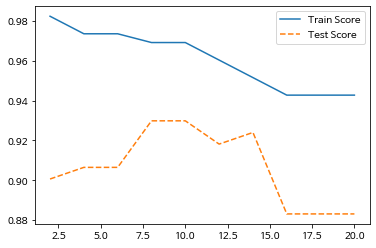

In [27]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf,train_accuracy,linestyle='-',label='Train Score')
plt.plot(para_leaf,test_accuracy,linestyle='--',label='Test Score')
plt.legend()

#### 잎사귀 노드 최소 자료 수 증가에 따라 모델의 정확도는 감소하며 Train/test 데이터의 성능 변화를 고려하여 14를 선택 

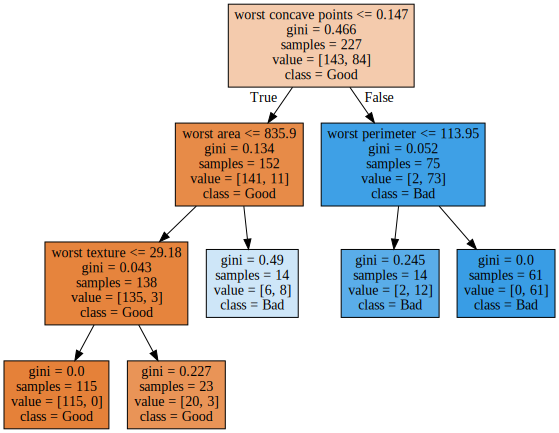

In [28]:
# 잎사귀 노드의 최소 사료 수가 14인 무델 
tree_low=DecisionTreeClassifier(random_state=1234,min_samples_leaf=14,\
                                min_samples_split=70, max_depth=4)
tree_low.fit(df_train_x,df_train_y)

export_graphviz(tree_low,out_file='tree_low.dot',class_names=["Good","Bad"],\
               feature_names=v_feature_name,impurity=True,filled=True)

with open('tree_low.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

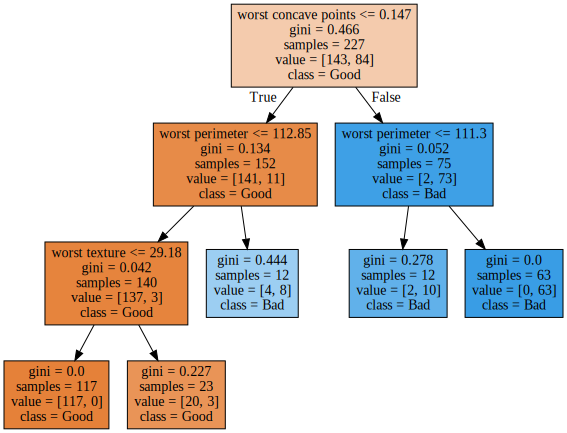

In [32]:
# 잎사귀 노드의 최소 사료 수가 12인 무델 
tree_hign=DecisionTreeClassifier(random_state=1234,min_samples_leaf=12,\
                                 min_samples_split=70,max_depth=4)
tree_hign.fit(df_train_x,df_train_y)

export_graphviz(tree_hign,out_file='tree_hign.dot',class_names=["Good","Bad"],\
               feature_names=v_feature_name,impurity=True,filled=True)

with open('tree_hign.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

#### 잎사귀 노드의 숫자 12와 14에는 가시적인 차이를 학인하기 어려워 그래프에서 확인한 14로 결정하였다. 

### 2-4 모델 파라미터 조정 - GridSearchCV를 이용한 최적 parameter 찾기 

In [31]:
estimator=DecisionTreeClassifier()

# 구하고자 하는 parameter와 범위
param_grid={'max_depth':para_depth,'min_samples_leaf':para_leaf,\
            'min_samples_split': para_split}

# 설명력이 높은 최적 parameter 찾기
grid_dt=GridSearchCV(estimator,param_grid,scoring='accuracy',n_jobs=-1)
grid_dt.fit(df_test_x,df_test_y)

print('best estimator model:\n{}'.format(grid_dt.best_estimator_))
print('\nbest parameter:\n{}'.format(grid_dt.best_params_))
print('\nbest score:\n{}'.format(grid_dt.best_score_.round(3)))

best estimator model:
DecisionTreeClassifier(max_depth=2, min_samples_leaf=10, min_samples_split=10)

best parameter:
{'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 10}

best score:
0.918


#### GridSearchCV를 이용하였을 때, 최대 깊이는 2, 잎사귀의 최소 샘플 수가 10일 때 정확도가 91.8%이다. GridSearchCV는 fit을 이용하여 data를 적합시킬 때 train/validation 데이터로 나누어 cross-validation을 적용하므로 앞선 결과와 다를 수 있다

# 3. 결론 도출

### 3-1 최종 모델 선택 

In [18]:
# 최종 모델 
tree_final=DecisionTreeClassifier(random_state=1234, max_depth=4 \
                              ,min_samples_split=10, min_samples_leaf=5)
tree_final.fit(df_train_x,df_train_y)

NameError: name 'df_train_x' is not defined

### 3-2 최종 모델 시각화 

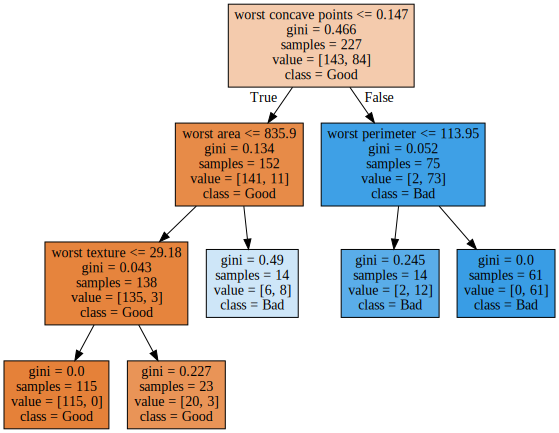

In [34]:
# tree_final.dot으로 결과 저장 
export_graphviz(tree_final, out_file="tree_final.dot", class_names=["Good","Bad"],\
               feature_names=v_feature_name, impurity=True, filled=True)

# tree_final.dot 그리기
with open("tree_final.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

In [35]:
# 평가 
y_pred=tree_final.predict(df_test_x)
print("Accuracy:{:.3f}".format(tree_final.score(df_train_x,df_train_y)))
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))

Accuracy:0.952
Confusion matrix:
[[97  8]
 [ 5 61]]


#### 모델 분석 결과 설명력은 95.2%이며 confusion matrix를 고려하였을 때 , 1을 0으로 판단할 확률이 5%로 낮아 모델은 타당하다고 평가할 수 있다. 
#### 트리 분리에 영향이 큰 두변수는 worst concave points와 worst area이다.
#### worst concave points가 <= 0.147이면 true,  >0.147이면 false로 판별한다. 
#### worst concave points <=0.147 & worst area<= 835.9이면 True로 분리된다. 

### 3-3 feature_importances_ : 설명 중요도

In [36]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance=pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance']=tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values('Importance',ascending=False,inplace=True)
df_importance.round(3)

,Feature,Importance
27,worst concave points,0.903
23,worst area,0.085
21,worst texture,0.007
22,worst perimeter,0.005
0,mean radius,0.000
1,mean texture,0.000
28,worst symmetry,0.000
26,worst concavity,0.000
25,worst compactness,0.000
24,worst smoothness,0.000


Text(0, 0.5, '변수')

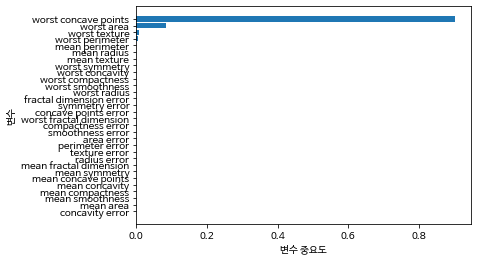

In [37]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values('Importance',ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance['Importance'])
plt.yticks(coordinates,df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

#### 설명 변수의 중요도를 평가한 결과, 'worst concave points'와 worst area가 중요도가 높은 것으로 나왔다. 하지만, 이 결과는 현재 모델에서 평가된 것으로 계산된 변수 중요도가 낮거나 0이더라도 선택되는 훈련 데이터에 따라 중요도는 변경될 수 있다. 

# 랜덤 포레스트

# 0. 패키지 불러오기 

In [38]:
# 데이터 구성:Series,DataFrame
import pandas as pd

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# export_graphviz : 나무 구조 생성 및 저장 
from sklearn.tree import export_graphviz

# graphviz : 나무 구조 시각화 (dot.확자아 파일 불러오기 등)
import graphviz

# 데이터 분할:train,test
from sklearn.model_selection import train_test_split

# 분류 Random Forest 
from sklearn.ensemble import RandomForestClassifier 

# 최적 모델, 파라미터 탐색 
from sklearn.model_selection import GridSearchCV

# 모델 성능 평가
from sklearn.metrics import confusion_matrix

# 한글 깨짐 방지
import matplotlib.font_manager as fm 
font_list=[font.name for font in fm.fontManager.ttflist]
font_list
plt.rcParams['font.family']='NanumBarunGothic'

# 나무 시각화 페이지

# os환경
import os

# PATH 설정:graphviz 설치된 경로 지정
os.environ['PATH']+=os.pathsep+'C:/Program Files (x86)/Graphviz2.38/bin/'

# 1. 데이터

### 1-1. 데이터 구성하기 

In [45]:
df_raw=pd.read_csv("/home/piai/Downloads/3/유방암.csv", engine='python')
df_raw.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 1-2. 데이터 전처리 - 결측치 처리

In [46]:
df_raw.isnull().sum(axis=0)

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [47]:
df_raw.fillna(df_raw.mean(), inplace=True)

### 1-3. 데이터 구성하기 - 더미변수 생성

In [48]:
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성
df_raw_dummy=pd.get_dummies(df_raw)

# 더미변수 생성된 데이터의 상위 5개 row를 확인
df_raw_dummy.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 1-4 설명변수, 목표변수 지정 

In [52]:
# 설명변수, 목표변수 데이터 지정 
df_raw_x=df_raw_dummy.drop("diagnosis", axis=1, inplace=False)
df_raw_y=df_raw_dummy["diagnosis"]

### 1-5 데이터 분할

In [51]:
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)
df_train_x,df_val_x,df_train_y,df_val_y=train_test_split(df_train_x,df_train_y,test_size=3/7,random_state=1234)
print('train data X size:{}'.format(df_train_x.shape))
print('train data Y size:{}'.format(df_train_y.shape))
print('validation data X size:{}'.format(df_val_x.shape))
print('validation data Y size:{}'.format(df_val_y.shape))
print('test data X size:{}'.format(df_test_x.shape))
print('test data Y size:{}'.format(df_test_y.shape))

train data X size:(227, 30)
train data Y size:(227,)
validation data X size:(171, 30)
validation data Y size:(171,)
test data X size:(171, 30)
test data Y size:(171,)


# 2.모델 생성

### 2-0 기본 모델으로  생성

In [53]:
# 랜덤 포레스트 생성 : RandomForestClassifer
rf_uncustomized=RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 설명력 
print("Accuracy on training set:{:.3f}".format(rf_uncustomized.score(df_train_x,df_train_y)))

# Test 데이터 설명력 
print("Accuracy on test set:{:.3f}".format(rf_uncustomized.score(df_test_x,df_test_y)))

Accuracy on training set:1.000
Accuracy on test set:0.924


#### training 데이터는 100%, test 데이터는 92.4%로 모델은 train 데이터에 과적합되어 있다. 

### 2-1 모델 파라미터 조정 : 트리수 변경에 따른 모델 성능 

In [56]:
# train 밒 test 정확도 결과 저장용 
train_accuracy=[]; test_accuracy=[]

# n_estimators: 트리 수 변경: 1~150 
para_n_tree=[n_tree*10 for n_tree in range(1,16)] # 참조 : para_split:[10,20,30,...,150]

for v_n_estimators in para_n_tree:
    rf=RandomForestClassifier(random_state=1234,n_estimators=v_n_estimators)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
    
# 데이터 테이블로 저장 
df_accuracy_n=pd.DataFrame()
df_accuracy_n['n_estimators']=para_n_tree
df_accuracy_n['TrainAccuracy']=train_accuracy
df_accuracy_n['TestAccuracy']=test_accuracy

# 모델 정확도 확인 
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,10,0.996,0.924
1,20,0.996,0.930
2,30,1.000,0.930
3,40,1.000,0.930
4,50,1.000,0.930
5,60,1.000,0.936
6,70,1.000,0.924
7,80,1.000,0.924
8,90,1.000,0.924
9,100,1.000,0.924


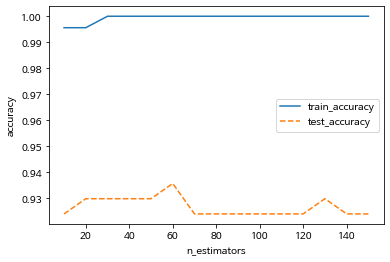

In [57]:
# 모델 설명력 그래프 확인
plt.plot(para_n_tree,train_accuracy,linestyle='-',label='train_accuracy')
plt.plot(para_n_tree,test_accuracy,linestyle='--',label='test_accuracy')
plt.ylabel('accuracy')
plt.xlabel('n_estimators')
plt.legend()

#### Train/test 데이터의 성능 변화를 고려하여 60을 선택하기로 했다.

#### 트리수 변경에 따른 모델 oob error 변화

In [58]:
# error 저장 리스트 
oob_error=[]

for v_n_estimator in range(1,151):
    rf=RandomForestClassifier(n_estimators=v_n_estimator, oob_score=True, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1-rf.oob_score_)

/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This prob

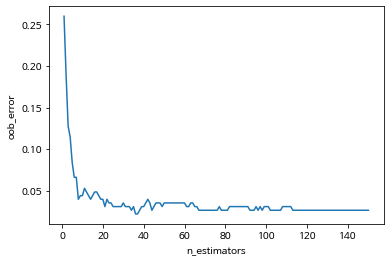

In [60]:
# 그래프로 표현
plt.plot(range(1,151), oob_error)
plt.ylabel("oob_error")
plt.xlabel("n_estimators")
# 트리 수 지정 
n_estimators=60

#### oob_error을 고려하였을 때 30을 고려할 수 있지만 60의 error값과 큰 차이는 아니므로 트리수는 60으로 지정한다. 

### 2-2 모델 파라미터 조정 : 최대 깊이 변경에 따른 모델 성능 

In [62]:
# train 밒 test 정확도 결과 저장용 
train_accuracy=[]; test_accuracy=[]

# max_depth: 최대 깊이 변경
para_depth=[depth for depth in range(1,11)] # 참조 : para_depth:[1,2,3,...,10]

for v_max_depth in para_depth:
    rf=RandomForestClassifier(random_state=1234,n_estimators=60, max_depth=v_max_depth)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
    
# 데이터 테이블로 저장 
df_accuracy_depth=pd.DataFrame()
df_accuracy_depth['Depthdepth']= para_depth
df_accuracy_depth['TrainAccuracy']=train_accuracy
df_accuracy_depth['TestAccuracy']=test_accuracy

# 모델 정확도 확인 
df_accuracy_depth.round(3)

,Depthdepth,TrainAccuracy,TestAccuracy
0,1,0.938,0.906
1,2,0.982,0.930
2,3,0.987,0.924
3,4,0.996,0.924
4,5,0.996,0.930
5,6,1.000,0.936
6,7,1.000,0.936
7,8,1.000,0.936
8,9,1.000,0.936
9,10,1.000,0.936


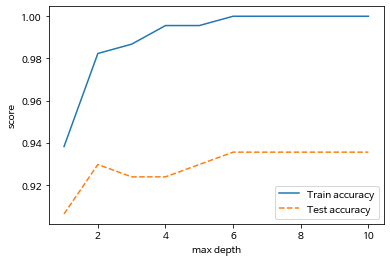

In [63]:
# 모델 설명력 그래프 확인
plt.plot(para_depth,train_accuracy,linestyle='-',label='Train accuracy')
plt.plot(para_depth,test_accuracy,linestyle='--',label='Test accuracy')
plt.ylabel('score')
plt.xlabel('max depth')
plt.legend()

#### 최대 깊이 증가에 따라 모델의 정확도는 증가하며 train/test 데이터의 성능 변화를 고려하여 6을 선택한다. 

### 2-3 모델 파라미터 조정 : 분리 노드의 최소 자료 수 변경에 따른 모델 성능 

In [64]:
# train 밒 test 정확도 결과 저장용 
train_accuracy=[]; test_accuracy=[]

# min_samples_split : 분할하기 위한 노드의 최소 샘플 수 
para_split=[n_split*10 for n_split in range(1,11)] # 참조 : para_split:[1,2,3,...,10]

for v_min_samples_split in para_split:
    rf=RandomForestClassifier(random_state=1234,n_estimators=60, max_depth=6 \
                              ,min_samples_split=v_min_samples_split)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
    
# 데이터 테이블로 저장 
df_accuracy_depth=pd.DataFrame()
df_accuracy_depth['MinSamplesSplit']= para_depth
df_accuracy_depth['TrainAccuracy']=train_accuracy
df_accuracy_depth['TestAccuracy']=test_accuracy

# 모델 정확도 확인 
df_accuracy_depth.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,1,0.991,0.924
1,2,0.987,0.924
2,3,0.987,0.924
3,4,0.987,0.924
4,5,0.982,0.924
5,6,0.982,0.918
6,7,0.982,0.912
7,8,0.982,0.918
8,9,0.978,0.924
9,10,0.974,0.924


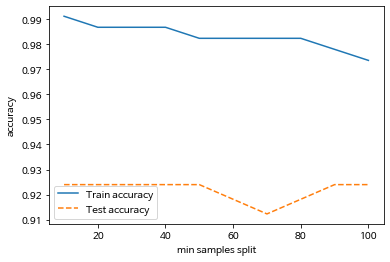

In [65]:
# 모델 설명력 그래프 확인
plt.plot(para_split,train_accuracy,linestyle='-',label='Train accuracy')
plt.plot(para_split,test_accuracy,linestyle='--',label='Test accuracy')
plt.ylabel('accuracy')
plt.xlabel('min samples split')
plt.legend()

#### 분리 노드의 최소  자료 수 증가에 따라 모델의 정확도는 감소하나 test 데이터의 성능 변화를 고려하여 90을 선택한다. 

### 2-4 모델 파라미터 조정 : 잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능

In [66]:
# train 밒 test 정확도 결과 저장용 
train_accuracy=[]; test_accuracy=[]

# min_samples_split : 분할하기 위한 노드의 최소 샘플 수 
para_leaf=[n_leaf*10 for n_leaf in range(1,11)] # 참조 : para_leaf:[1,2,3,...,10]

for v_min_samples_leaf in para_leaf:
    rf=RandomForestClassifier(random_state=1234,n_estimators=100, max_depth=4 \
                              ,min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
    
# 데이터 테이블로 저장 
df_accuracy_depth=pd.DataFrame()
df_accuracy_depth['MinSamplesSplit']= para_depth
df_accuracy_depth['TrainAccuracy']=train_accuracy
df_accuracy_depth['TestAccuracy']=test_accuracy

# 모델 정확도 확인 
df_accuracy_depth.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,1,0.982,0.936
1,2,0.960,0.930
2,3,0.943,0.924
3,4,0.938,0.912
4,5,0.943,0.895
5,6,0.938,0.906
6,7,0.921,0.883
7,8,0.630,0.614
8,9,0.630,0.614
9,10,0.630,0.614


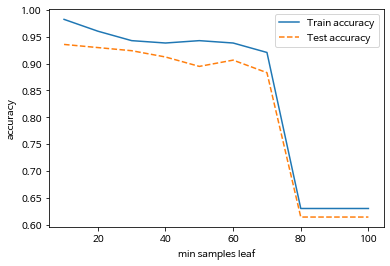

In [67]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf,train_accuracy,linestyle='-',label='Train accuracy')
plt.plot(para_leaf,test_accuracy,linestyle='--',label='Test accuracy')
plt.ylabel('accuracy')
plt.xlabel('min samples leaf')
plt.legend()

#### 잎사귀 노드 최소 자료 수 증가에 따라 모델의 정확도는 감소하며, Train/test 데이터의 성능 변화를 고려하여 30을 선택한다 .

### 2-5 모델 파라미터 조정 : GirdSearchCV를 이용한 최적 parameter 찾기

In [69]:
# 모듈 추가 : 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

In [70]:
estimator=RandomForestClassifier(random_state=1234,n_estimators=60)

# 구하고자 하는 parameter와 범위
param_grid={'max_depth':para_depth,'min_samples_leaf':para_leaf}

# 설명력이 높은 최적 parameter 찾기
grid_rf=GridSearchCV(estimator,param_grid,scoring='accuracy',n_jobs=-1)
grid_rf.fit(df_test_x,df_test_y)

print('best estimator model:\n{}'.format(grid_rf.best_estimator_))
print('\nbest parameter:\n{}'.format(grid_rf.best_params_))
print('\nbest score:\n{}'.format(grid_rf.best_score_.round(3)))

best estimator model:
RandomForestClassifier(max_depth=1, min_samples_leaf=20, n_estimators=60,
                       random_state=1234)

best parameter:
{'max_depth': 1, 'min_samples_leaf': 20}

best score:
0.924


#### GridSearchCV를 이용하였을 때 최대 깊이는 1, 최소 잎사귀 갯수는 20개로 나왔다. 

# 3. 결론 도출

### 3-1 최종 모델 선택

In [71]:
# 최종 모델 
rf_final=RandomForestClassifier(random_state=1234,n_estimators=100, max_depth=4 \
                              ,min_samples_leaf=20)
rf_final.fit(df_train_x,df_train_y)

# 평가 
y_pred=rf_final.predict(df_test_x)

# Train 데이터 설명력 
print("Accuracy on training set:{:.3f}".format(rf_final.score(df_train_x,df_train_y)))

# Test 데이터 설명력 
print("Accuracy on test set:{:.3f}".format(rf_final.score(df_test_x,df_test_y)))

# Confusion matrix
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))


Accuracy on training set:0.960
Accuracy on test set:0.930
Confusion matrix:
[[104   1]
 [ 11  55]]


#### train/test 데이터의 정분류율이 비슷한 수준으로 안정적인 모델임을 확인할 수 있다. 하지만 Confusion matrix에서 104개중 11의 1을 0으로 판단할 것을 고려한다면 정확도 개선이 필요하다고 생각된다. 

### 3-2 feature_importances_ : 설명 중요도 

In [72]:
# 변수명
v_feature_name=df_train_x.columns

# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance=pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance']=rf_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values('Importance',ascending=False,inplace=True)
df_importance.round(3)

,Feature,Importance
22,worst perimeter,0.162
20,worst radius,0.140
27,worst concave points,0.136
23,worst area,0.103
7,mean concave points,0.096
6,mean concavity,0.090
0,mean radius,0.066
2,mean perimeter,0.055
3,mean area,0.037
26,worst concavity,0.032


Text(0, 0.5, '변수')

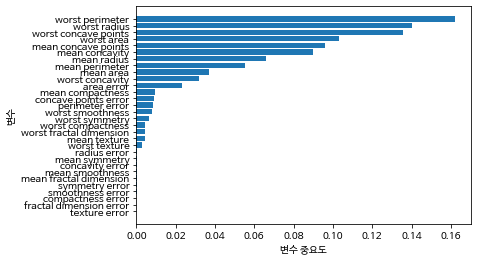

In [73]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values('Importance',ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance['Importance'])
plt.yticks(coordinates,df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

#### 설명 변수의 중요도를 평가한 결과, 'worst perimeter','worst concave points'와 'worst radius'가 중요도가 높은 것으로 나왔다. 즉, 최악의 변수가 암 진단에 중요한 영향을 미친 것을 알 수 있다. 
#### 하지만, 이 결과는 현재 모델에서 평가된 것으로 계산된 변수 중요도가 낮거나 0이더라도 선택되는 훈련 데이터에 따라 중요도는 변경될 수 있다. 